<a href="https://colab.research.google.com/github/B34R-e/Basic-Deep-Learning/blob/main/Simple_Autoencoder_In_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
# transform IMAGES to Pytorch Tensor
transform = transforms.ToTensor()

# Load the MNIST data
mnist_data = datasets.MNIST(root='./data', train = True, download = True, transform = transform)

data_loader = torch.utils.data.DataLoader(dataset = mnist_data,
                                          batch_size = 64,
                                          shuffle = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 104303558.29it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 110930122.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24933721.97it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21772032.88it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [12]:
class Autoencoder(nn.Module):
  def __init__(self):
    # initial dimension N, 784 (784 = 28*28)
    # Sequential Model for the Encoder
    super().__init__()

    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128), # N, 784 -> N, 128
        nn.ReLU(), # add activation function
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 12),
        nn.ReLU(),
        nn.Linear(12, 3) # Final ouput is N, 3.
    )

    self.decoder = nn.Sequential(
        nn.Linear(3, 12) ,# N, 3 -> N, 12
        nn.ReLU(), # add activation function
        nn.Linear(12, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28*28), # Final ouput is N, 784.
        nn.Sigmoid() # cause our images values in [0, 1]
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

# the activation function in the last layer of decoder depends on the data values !
# for example: if the data values between [0, 1] -> sigmoid
# if the data values between [-1, 1] -> nn.Tanh

In [13]:
model = Autoencoder()
criterion = nn.MSELoss() # Reconstruction Loss
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [14]:
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
  for (img, _) in data_loader:
    img = img.reshape(-1, 28*28)
    recon = model(img)
    loss = criterion(recon, img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch:{epoch + 1}, Loss:{loss.item():.4f}')
  outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0511
Epoch:2, Loss:0.0440
Epoch:3, Loss:0.0427
Epoch:4, Loss:0.0379
Epoch:5, Loss:0.0352
Epoch:6, Loss:0.0332
Epoch:7, Loss:0.0343
Epoch:8, Loss:0.0344
Epoch:9, Loss:0.0368
Epoch:10, Loss:0.0336


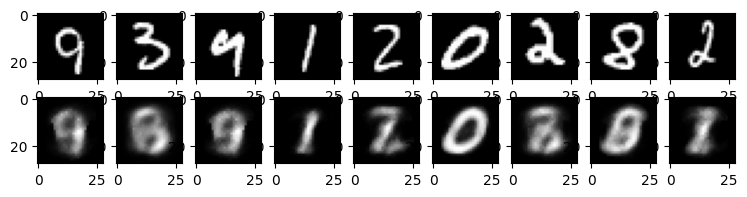

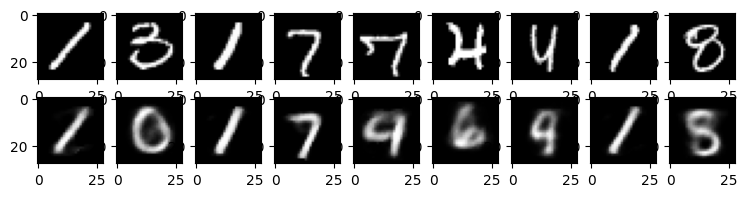

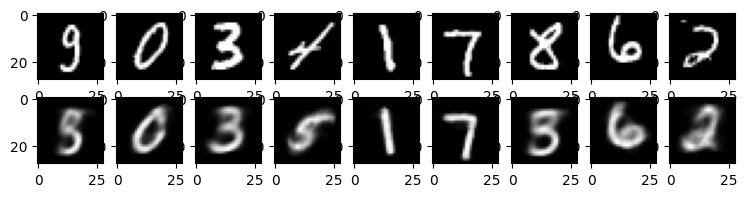

In [15]:
for k in range(0, num_epochs, 4):
  plt.figure(figsize=(9, 2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()
  recon = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9: break
    plt.subplot(2, 9, i+1)
    item = item.reshape(-1, 28, 28)
    # item: 1, 28, 28
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i >= 9: break
    plt.subplot(2, 9, 9+i+1) # row_length + i + 1
    item = item.reshape(-1, 28, 28)
    # item: 1, 28, 28
    plt.imshow(item[0])